# Mathematical Underpinnings - Lab 3

  - A set $S_n = \{x_1, x_2, \ldots, x_n\}$ is **shattered** by a class $\mathcal{C}$ (or $\mathcal{C}$ shatters $S_n$) if $|\{S_n \cap c: c \in \mathcal{C}\}| = 2^n$.

  - **Shattering coefficient** of $\mathcal{C}$ is a number such that $\mathcal{S}_{\mathcal{C}}(n) = \max_{S_n} |\{S_n \cap c: c \in \mathcal{C}\}|$.

  - **Vapnik–Chervonenkis** dimension of $\mathcal{C}$ is $VC(\mathcal{C}) = \min_n \{n: \mathcal{S}_{\mathcal{C}}(n) < 2^n\}$.

*What to do if we have a class of functions $\mathcal{F}$ instead of a set of subsets $\mathcal{C}$*

  - **Subgraph** of a function $f$ is defined as $\textrm{Subgraph}(f) = \{x: f(x) \leq 0\}$.

  - Then $\mathcal{C}$ from the above definitions is defined as $\mathcal{C} = \{\textrm{Subgraph}(f): f \in \mathcal{F}\}$

  - **Example** for linear decision boundaries in $\mathbb{R}^2$: 
  
      A function: $f_b(x) = f_b(x^{1}, x^{2}) = b^{0} + b^{1}x^{1} + b^{2}x^{2}$
      
      A hyperplane (in $\mathbb{R}^2$ a line): $f_b(x^{1}, x^{2}) = b^{0} + b^{1}x^{1} + b^{2}x^{2} = 0$

      $\textrm{Subgraph}(f_b) = \{\textrm{A half space bounded by a hyperplane given above}\}$

      A family of functions: $\mathcal{F} = \{f_b: b \in \mathbb{R}^3\}$
  
      $\mathcal{C} = \{\textrm{All half spaces separated by all hyperplanes}\}$

## Task 1

### a)

Facts from the lecture:

  - If $\mathcal{F}_{a,b} = \{f: f(x) = a'x +b\}$ (a family of linear functions in $\mathbb{R}^d$), then $VC(\mathcal{F}_{a,b}) \leq d+2$.
  - If $\mathcal{F}_{a,b} = \{f: f(x) = a'x +b\}$ (a family of linear functions in $\mathbb{R}^d$), then $VC(\mathcal{F}_{a,b}) = d+1$.

Of course the second implies the first fact, but both are given as proving inequality is simpler (and we repeat what exactly was on the lecture).


*Pictures on paper*

### b)

In [2]:
# useful functions to find all possible assigments of classes:
# (I recommend usin combinations, as we don't need to compute the same with the classes swiched)

from itertools import combinations
from itertools import permutations
from itertools import product, islice
from sklearn.svm import SVC
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
list(product(*[[4,3], [1,2]]))

[(4, 1), (4, 2), (3, 1), (3, 2)]

In [4]:
# # S_n is an array (n) x (d). In rows are point in R^d and there are n of them
def is_shattered(S_n):
    n = S_n.shape[0]
    binaries = [[0,1]]*n
    all_assigments = product(*binaries)
    for y in islice(all_assigments,1,  int((2**n)/2+1)):
        model = SVC(C=10000, shrinking=False, kernel='linear', tol=1e-5)
        model.fit(S_n, y)
        if model.score(S_n, y) != 1:
            return False
    #     check if they are linearly separable
    #     i.e. if we can fit a line so for the points in S_n with classes y the classification error is 0

    # if for at least for one y the answer is no, then return False, else return True
    return True

In [5]:
S_n = np.random.normal(size=(5, 2))

In [6]:
S_n

array([[ 0.79774478, -1.01008138],
       [-0.40136924,  2.2738424 ],
       [ 1.61514303, -0.58468019],
       [-2.03385398, -1.67417542],
       [-0.71165082, -0.42213297]])

In [7]:
is_shattered(S_n)

False

In [8]:
S_n = np.random.normal(size=(3, 2))

In [9]:
is_shattered(S_n)

True

### c)

In [10]:
def draw_separation(X, y, model):
    sns.scatterplot(X, c=y)
    points = [[model.coef_[0,0], 0], [2*model.coef_[0,1] + model.coef_[0,0], 2]]
    plt.plot(*points, linewidth=2)
    plt.show

In [11]:
def plot_decision(X, y, model):
    # Generate a grid of points
    x1 = np.linspace(-10, 20, 100)
    x2 = np.linspace(-10, 20, 100)
    X1, X2 = np.meshgrid(x1, x2)
    X_grid = np.column_stack((X1.ravel(), X2.ravel()))

    # Predict the probabilities for the grid points
    y_proba_grid = model.predict(X_grid)

    # Reshape the probabilities to match the grid shape
    y_proba_grid = y_proba_grid.reshape(X1.shape)

    # Plot the decision function
    plt.contourf(X1, X2, y_proba_grid, cmap='RdBu', alpha=0.8)
    plt.colorbar()

    # Plot the data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdBu', edgecolors='k')

    # Set the axis labels and title
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Function')

    # Show the plot
    plt.show()


In [12]:
# there should be 2^n = 2^4 = 16 pictures 
# (or 8 if you don't differentiate class swithes, 
# or 8-1=7 if you don't take into account the case in which all observations belongs to one class)

In [13]:
def is_shattered_with_plot(S_n):
    n = S_n.shape[0]
    binaries = [[0,1]]*n
    all_assigments = product(*binaries)
    # islice(all_assigments,1,  int((2**n)/2+1))
    for y in islice(all_assigments,1,  int((2**n)/2)):
    # for y in islice(all_assigments,1, 2**n-1):
        model = SVC(C=10000, shrinking=False, kernel='linear', tol=1e-5)
        model.fit(S_n, y)
        plot_decision(S_n, y, model)
        # if model.score(S_n, y) != 1:
            # return False
    #     check if they are linearly separable
    #     i.e. if we can fit a line so for the points in S_n with classes y the classification error is 0

    # if for at least for one y the answer is no, then return False, else return True
    # return True

In [14]:
S_n = np.random.normal(size=(4, 2))

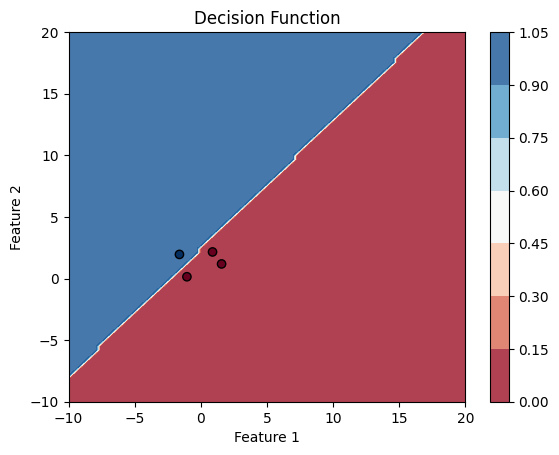

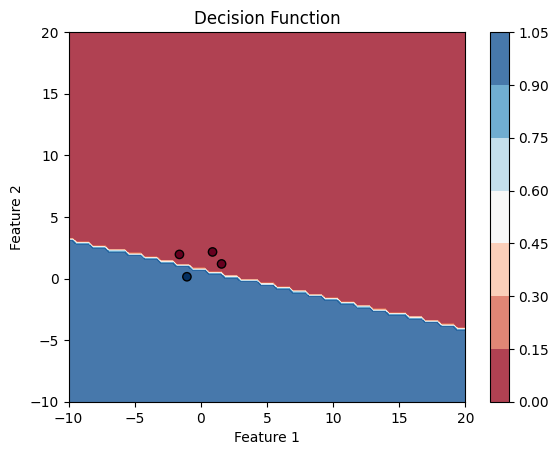

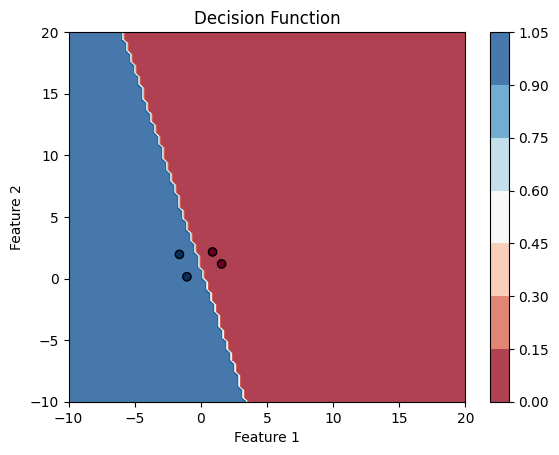

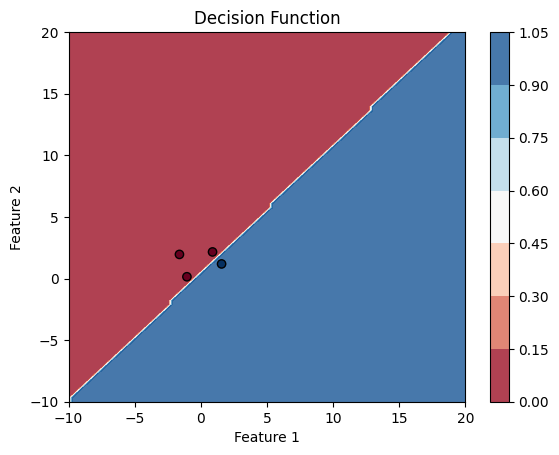

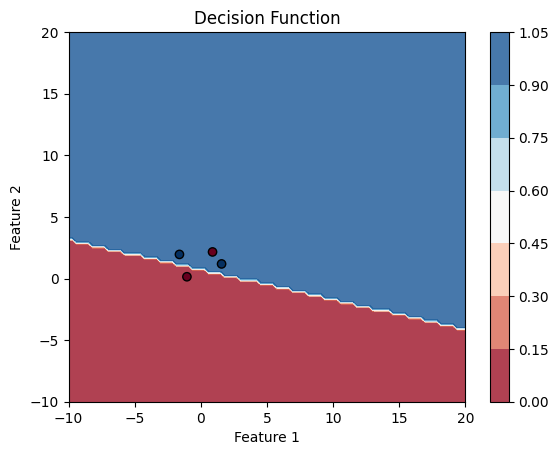

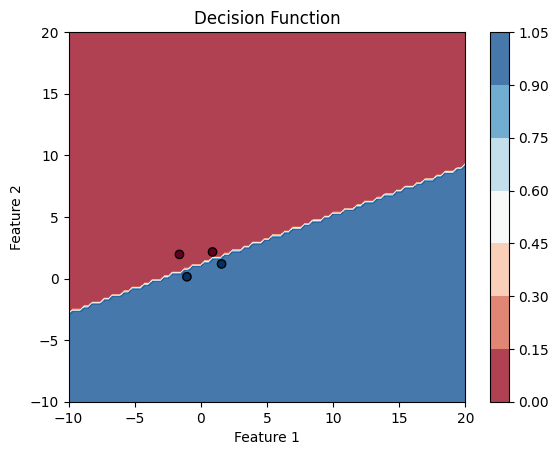

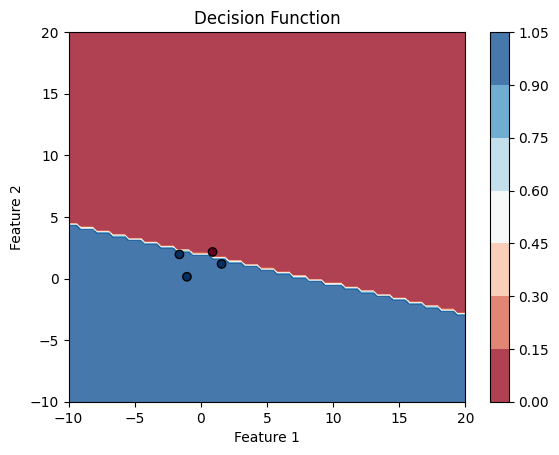

In [15]:
is_shattered_with_plot(S_n)

### d)

In [16]:
# code
N = 50
for d in range(2, 11):
    n = 2
    while True:
        for _ in range(N):
            S_n = np.random.normal(size=(n, d))
            if is_shattered(S_n):
                n += 1
                break
        else:
            break
    print(d, n)
        

2 4
3 5
4 6
5 7
6 8
7 9
8 10
9 11
10 12


### e)